# Fonte de dados  https://www.gru.com.br/pt/institucional/informacoes-operacionais

In [4]:
%config IPCompleter.greedy=True
import pandas as pd

# flattening list    
flatten = lambda l: [item for sublist in l for item in sublist]

# importando dataset
df = pd.read_csv("https://raw.githubusercontent.com/sinhorinho/indicadores-aeroportos/master/dados.csv")

#df = pd.read_csv("dados.csv")
df


,MÊS,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,01 - JAN,3072331,3589387,3804729,3674326,3447322,3763902,4004634,4233709,2286909.0
1,02 - FEV,2515918,2954750,2994581,2972749,2790148,3070211,3362852,3567484,1597869.0
2,03 - MAR,2872062,3172143,3100006,2948159,3037730,3378986,3562249,2450948,1145805.0
3,04 - ABR,2732626,3170158,3075647,2846967,2845364,3320989,3378273,279407,1065015.0
4,05 - MAI,2874254,3128800,3094241,2870786,2921197,3389600,3158184,316793,NaN
5,06 - JUN,2858630,3043624,3016587,2837694,2903515,3270866,3142758,435752,NaN
6,07 - JUL,3305376,3522828,3617078,3358541,3498686,3982423,3774394,737209,NaN
7,08 - AGO,2992297,3364311,3303752,3034686,3220790,3571140,3632305,1063458,NaN
8,09 - SET,3018780,3258976,3161001,2923838,3153049,3452948,3597720,1372941,NaN
9,10 - OUT,3212818,3472270,3274197,3039886,3278261,3571611,3708648,1662173,NaN


In [5]:

# Formatação e limpeza dos dados

# Criando matriz tansposta
df_transposed = df.transpose()

# Criando nova coluna apenas com os dígitos do mês [01 - 12]
df_transposed.loc['MES_DIGIT'] = [ x[0:2] for x in df_transposed.loc['MÊS']]

# Para cada coluna é gerada uma lista de 12 meses no formato yyyy-mm
dates = [year +"-"+ df_transposed.loc['MES_DIGIT'] for year in df.columns[1:].values]

# Todas as listas são mescladas criando uma lista única de datas
dates = flatten(dates)

# Cria uma lista única com todos os passajeiros
passengers = df_transposed.drop(['MÊS','MES_DIGIT']).values.flatten()

# Criando dataframe na estrutura esperada pelo prophet (DS, Y)
ts_df = pd.DataFrame({'ds': dates, 'y': passengers})

# Cria índice
ts_df['ds'] = pd.DatetimeIndex(ts_df['ds'])

# Exibe 5 primeiros registros do dataset
ts_df.head()

,ds,y
0,2013-01-01,3072331
1,2013-02-01,2515918
2,2013-03-01,2872062
3,2013-04-01,2732626
4,2013-05-01,2874254


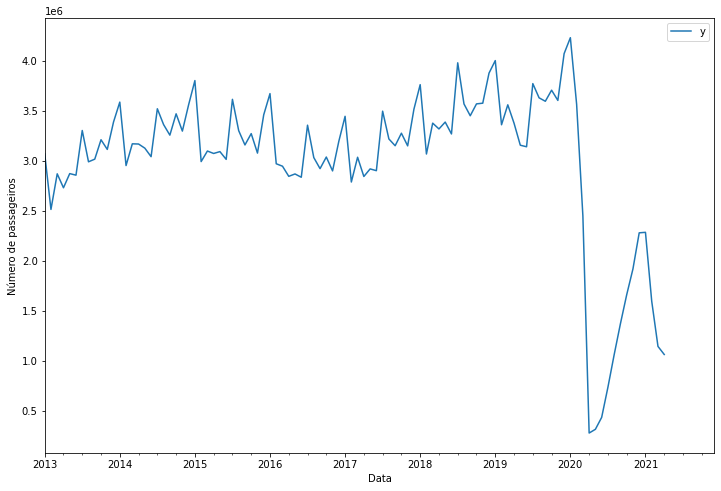

In [6]:

%matplotlib inline

import matplotlib.pyplot as plt

ax = ts_df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Número de passageiros')
ax.set_xlabel('Data')

plt.show()

In [7]:
from fbprophet import Prophet
model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
model.fit(ts_df)

In [8]:
# Gerando datas futuras para predição
future = model.make_future_dataframe(periods=13, freq = 'm')
future.tail(15)

,ds
106,2021-11-01
107,2021-12-01
108,2021-12-31
109,2022-01-31
110,2022-02-28
111,2022-03-31
112,2022-04-30
113,2022-05-31
114,2022-06-30
115,2022-07-31


In [9]:
# Aplicando algoritmo de predição
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
106,2021-11-01,1.823192e+06,7.083834e+05,2.893737e+06
107,2021-12-01,2.091608e+06,1.041601e+06,3.124426e+06
108,2021-12-31,2.445574e+06,1.411229e+06,3.549653e+06
109,2022-01-31,1.556213e+06,4.261735e+05,2.692463e+06
110,2022-02-28,1.293832e+06,2.480098e+05,2.370998e+06
111,2022-03-31,1.340296e+06,1.882051e+05,2.411634e+06
112,2022-04-30,1.467098e+06,3.422807e+05,2.541125e+06
113,2022-05-31,1.135877e+06,5.678964e+04,2.241784e+06
114,2022-06-30,1.779367e+06,6.767000e+05,2.908017e+06
115,2022-07-31,1.641585e+06,5.789175e+05,2.672241e+06


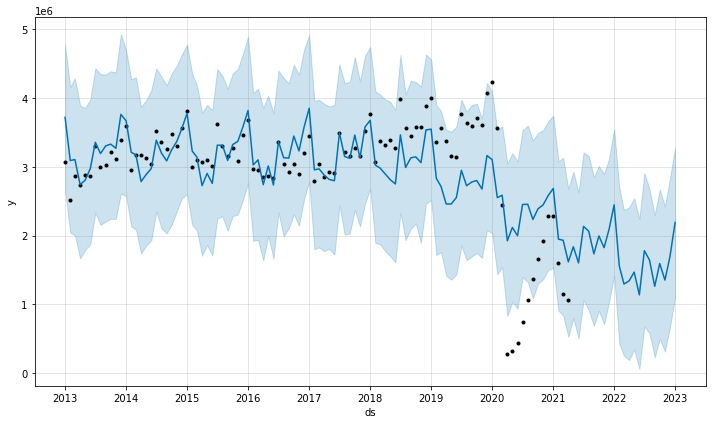

In [10]:

# Exibindo valores para novas datas 

model.plot(forecast,uncertainty=True)
plt.show()

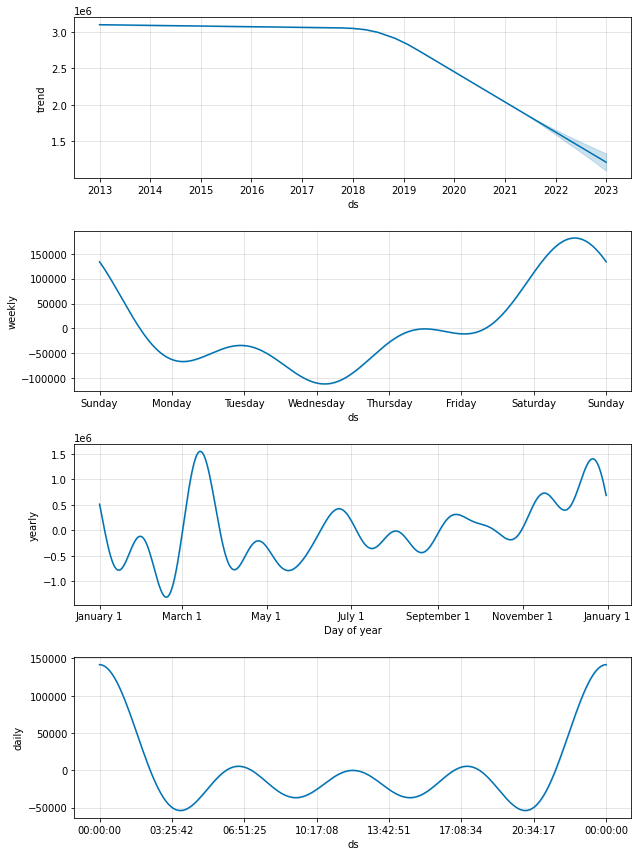

In [11]:
# Exibindo tendência e comportanto anual
model.plot_components(forecast)
plt.show()